In [1]:
model_name = 'models/xgboost_third_model_not_2025.json'

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, auc
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
xgb_model = xgb.XGBClassifier()
xgb_model.load_model(model_name)

In [4]:
table = pd.read_csv('/mnt/d/acoustics-data/scrap_xgb_bird_present/clean-features/combined_features.csv', 
                    low_memory=False)
not_bc = table[table['dataset']!='birdclef']
bc = table[table['dataset']=='birdclef']
del table

In [5]:
bc['year'] = bc['file_name'].apply(lambda x: int(x.split('-')[1][:4]))
bc['bird'] = bc['file_name'].apply(lambda x: x.split('/')[1])

In [6]:
# subtable = not_bc[not_bc['dataset'] == 'esc50']
subtable = bc[bc['year'] == 2025]
X = subtable[[f'feature_{i}' for i in range(24)]].to_numpy()
y = subtable['hasbird'].to_numpy()
y_pred = xgb_model.predict(X)
y_pred_proba = xgb_model.predict_proba(X)[:, 1]
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.10      0.07      1783
           1       0.97      0.94      0.96     59402

    accuracy                           0.91     61185
   macro avg       0.51      0.52      0.51     61185
weighted avg       0.95      0.91      0.93     61185



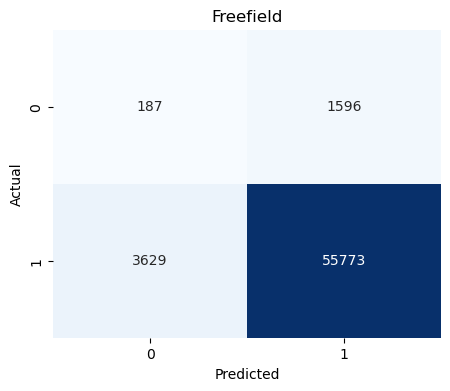

In [7]:
# plot the confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Freefield')
plt.show()

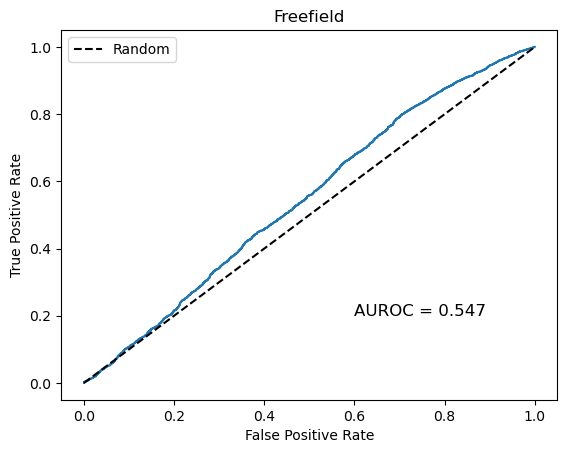

In [8]:

# plot the roc curve
fpr_proba, tpr_proba, _ = roc_curve(y, y_pred_proba)
plt.plot(fpr_proba, tpr_proba,)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Freefield')
auroc = auc(fpr_proba, tpr_proba)
plt.text(0.6, 0.2, f'AUROC = {auroc:.3f}', fontsize=12)
plt.legend()
plt.show()